In [191]:
import matplotlib.pyplot as plt
import scipy.integrate as sp
import numpy as np
import pysindy as ps
import time

from generate_lorenz96_model import generate_lorenz96_model




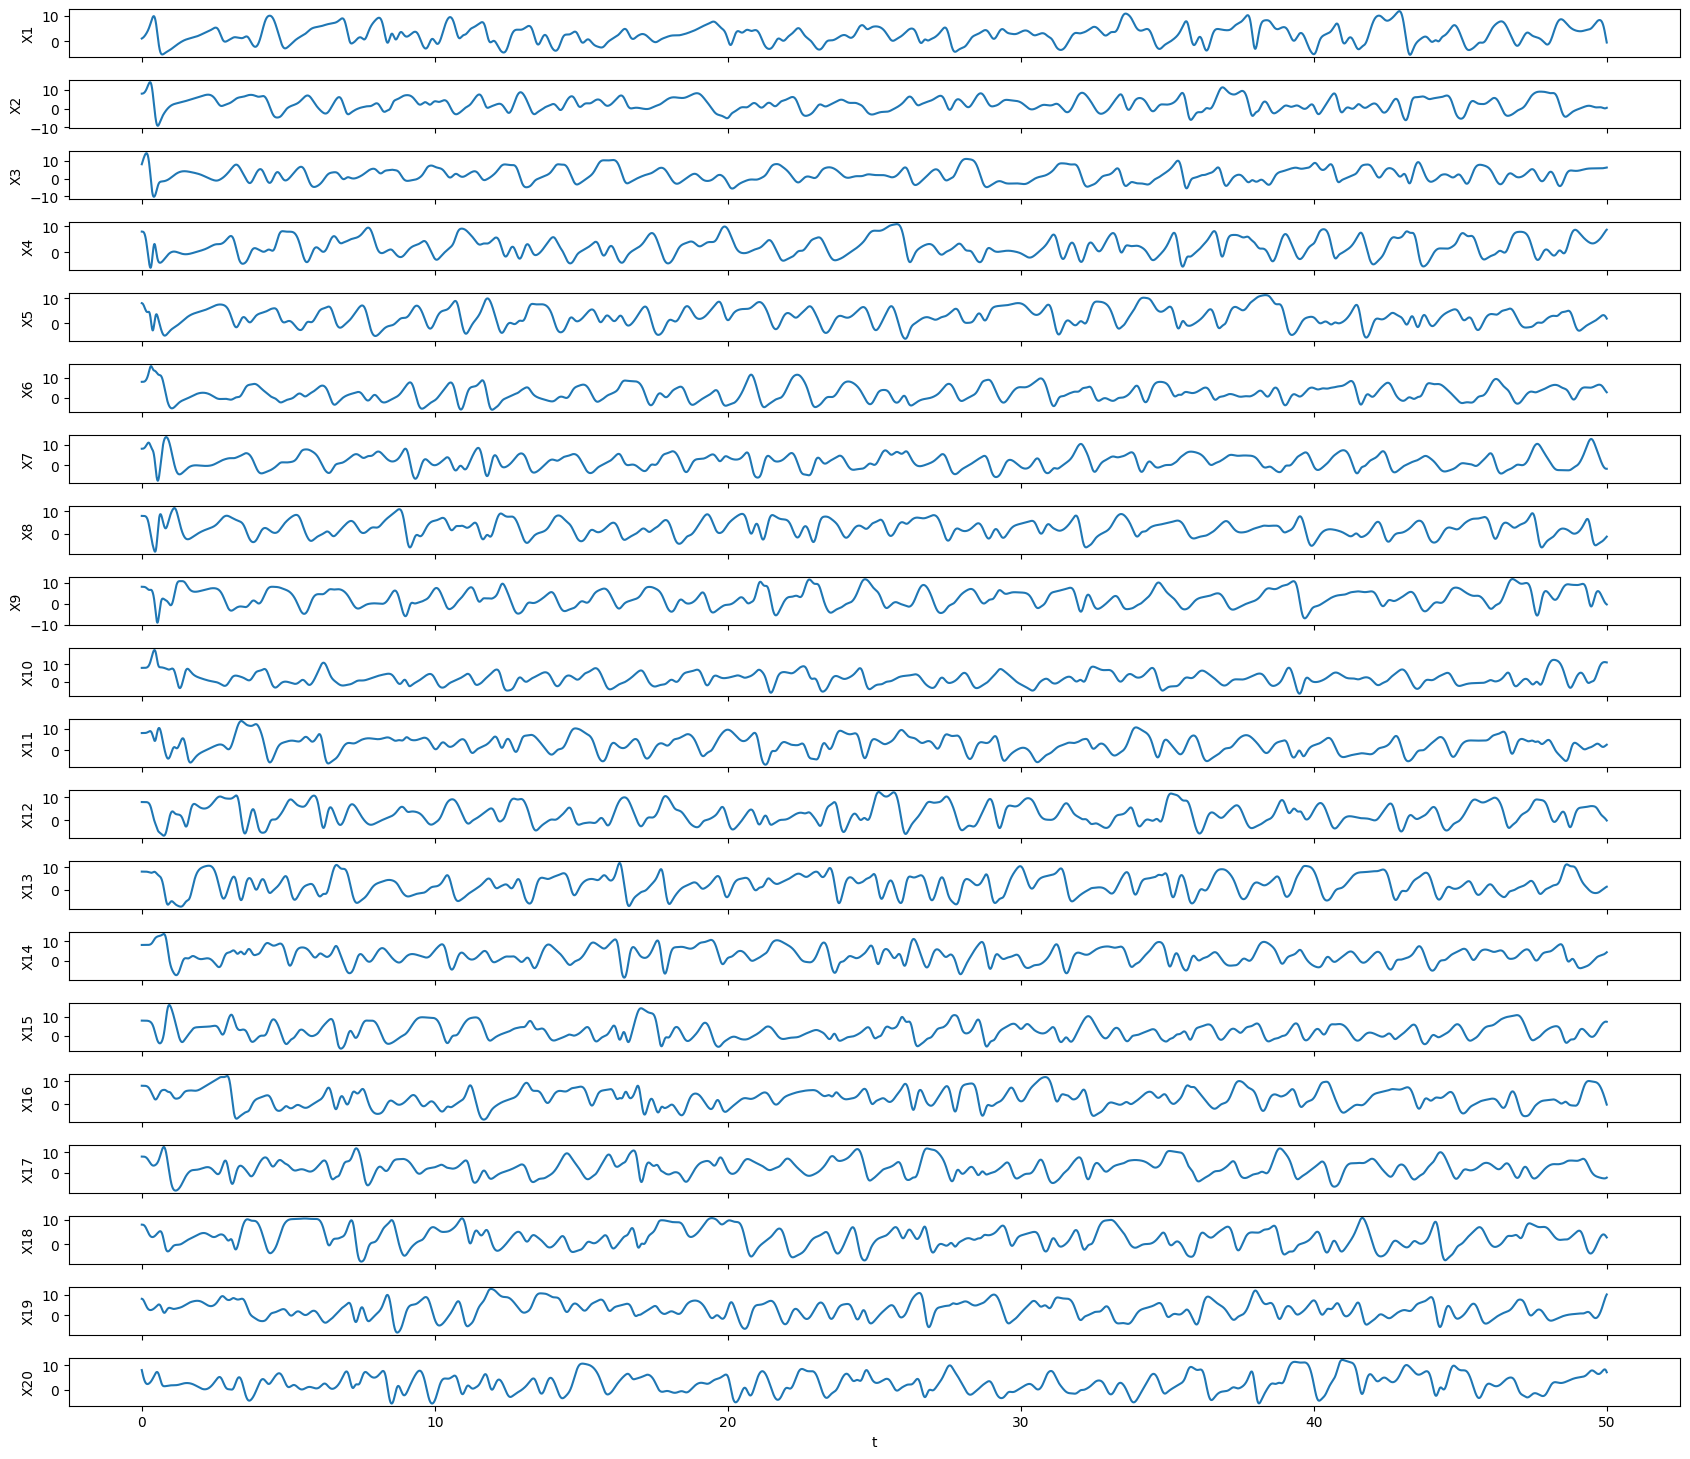

In [192]:
# Step 1: Generate data
# n from 4 to 20
n = 20
F = 8

lorenz96 = generate_lorenz96_model(n, F)

dt = 0.001
t = np.arange(0, 50, dt)

X0 = [8 for i in range(n)]
X0[0] = 1

X = sp.odeint(lorenz96, X0, t, tfirst=True)
# print(X.shape)

eps = 1
X_dot = np.zeros(X.shape)
for i in range(0, len(t)):
    X_dot[i, :] = lorenz96(t[i], X[i, :])

X_dot = X_dot + eps*np.random.randn(X_dot.shape[0], X_dot.shape[1])

# plot orbit
plt.ion()
plt.figure(figsize=(17,15))

for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i])
    plt.ylabel('X'+str(i+1))
    
    if i < n-1: 
        plt.tick_params(axis='x', labelbottom=False)

plt.xlabel('t')
plt.show()


# Step 1: Using finite differences to obtain the derivative matrix. | Mainly used for noise-free orbits.
differentiation_method = ps.FiniteDifference(order=2)


In [193]:
# Step 2: Build basis library
feature_library = ps.PolynomialLibrary(degree=2)


In [194]:
# Step 3: Solve
# optimizer = ps.STLSQ(threshold=0.2)
optimizer = ps.STLSQ(threshold=0.5, alpha=1e-6)

# model = ps.SINDy(
#     differentiation_method=differentiation_method,
#     feature_library=feature_library,
#     optimizer=optimizer,
#     feature_names=["x1", "x2", "x3", "x4", "x5", "x6"],
# )

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer
)

# model.fit(X, t=t)

model.fit(x=X, t=t, x_dot=X_dot)

model.print(precision=6)

(x[0 ])' = 8.005379 * 1 - 1.000706 * x[0 ] + 0.999872 * x[1 ]*x[19] - 1.000061 * x[18]*x[19]
(x[1 ])' = 8.003099 * 1 - 0.998981 * x[1 ] + 1.000031 * x[0 ]*x[2 ] - 0.999935 * x[0 ]*x[19]
(x[2 ])' = 8.001293 * 1 - 1.001453 * x[2 ] - 0.999904 * x[0 ]*x[1 ] + 1.000032 * x[1 ]*x[3 ]
(x[3 ])' = 8.003027 * 1 - 1.001806 * x[3 ] - 1.000051 * x[1 ]*x[2 ] + 1.000243 * x[2 ]*x[4 ]
(x[4 ])' = 7.998878 * 1 - 0.999208 * x[4 ] - 1.000004 * x[2 ]*x[3 ] + 1.000080 * x[3 ]*x[5 ]
(x[5 ])' = 8.005195 * 1 - 1.002353 * x[5 ] - 1.000205 * x[3 ]*x[4 ] + 0.999790 * x[4 ]*x[6 ]
(x[6 ])' = 7.994410 * 1 - 0.996865 * x[6 ] - 0.999768 * x[4 ]*x[5 ] + 1.000053 * x[5 ]*x[7 ]
(x[7 ])' = 7.990393 * 1 - 0.999082 * x[7 ] - 0.999807 * x[5 ]*x[6 ] + 1.000370 * x[6 ]*x[8 ]
(x[8 ])' = 8.004395 * 1 - 1.000568 * x[8 ] - 1.000064 * x[6 ]*x[7 ] + 1.000082 * x[7 ]*x[9 ]
(x[9 ])' = 8.003817 * 1 - 0.999672 * x[9 ] - 1.000286 * x[7 ]*x[8 ] + 1.000129 * x[8 ]*x[10]
(x[10])' = 7.998471 * 1 - 1.001969 * x[10] - 1.000095 * x[8 ]*x[9 ] + 

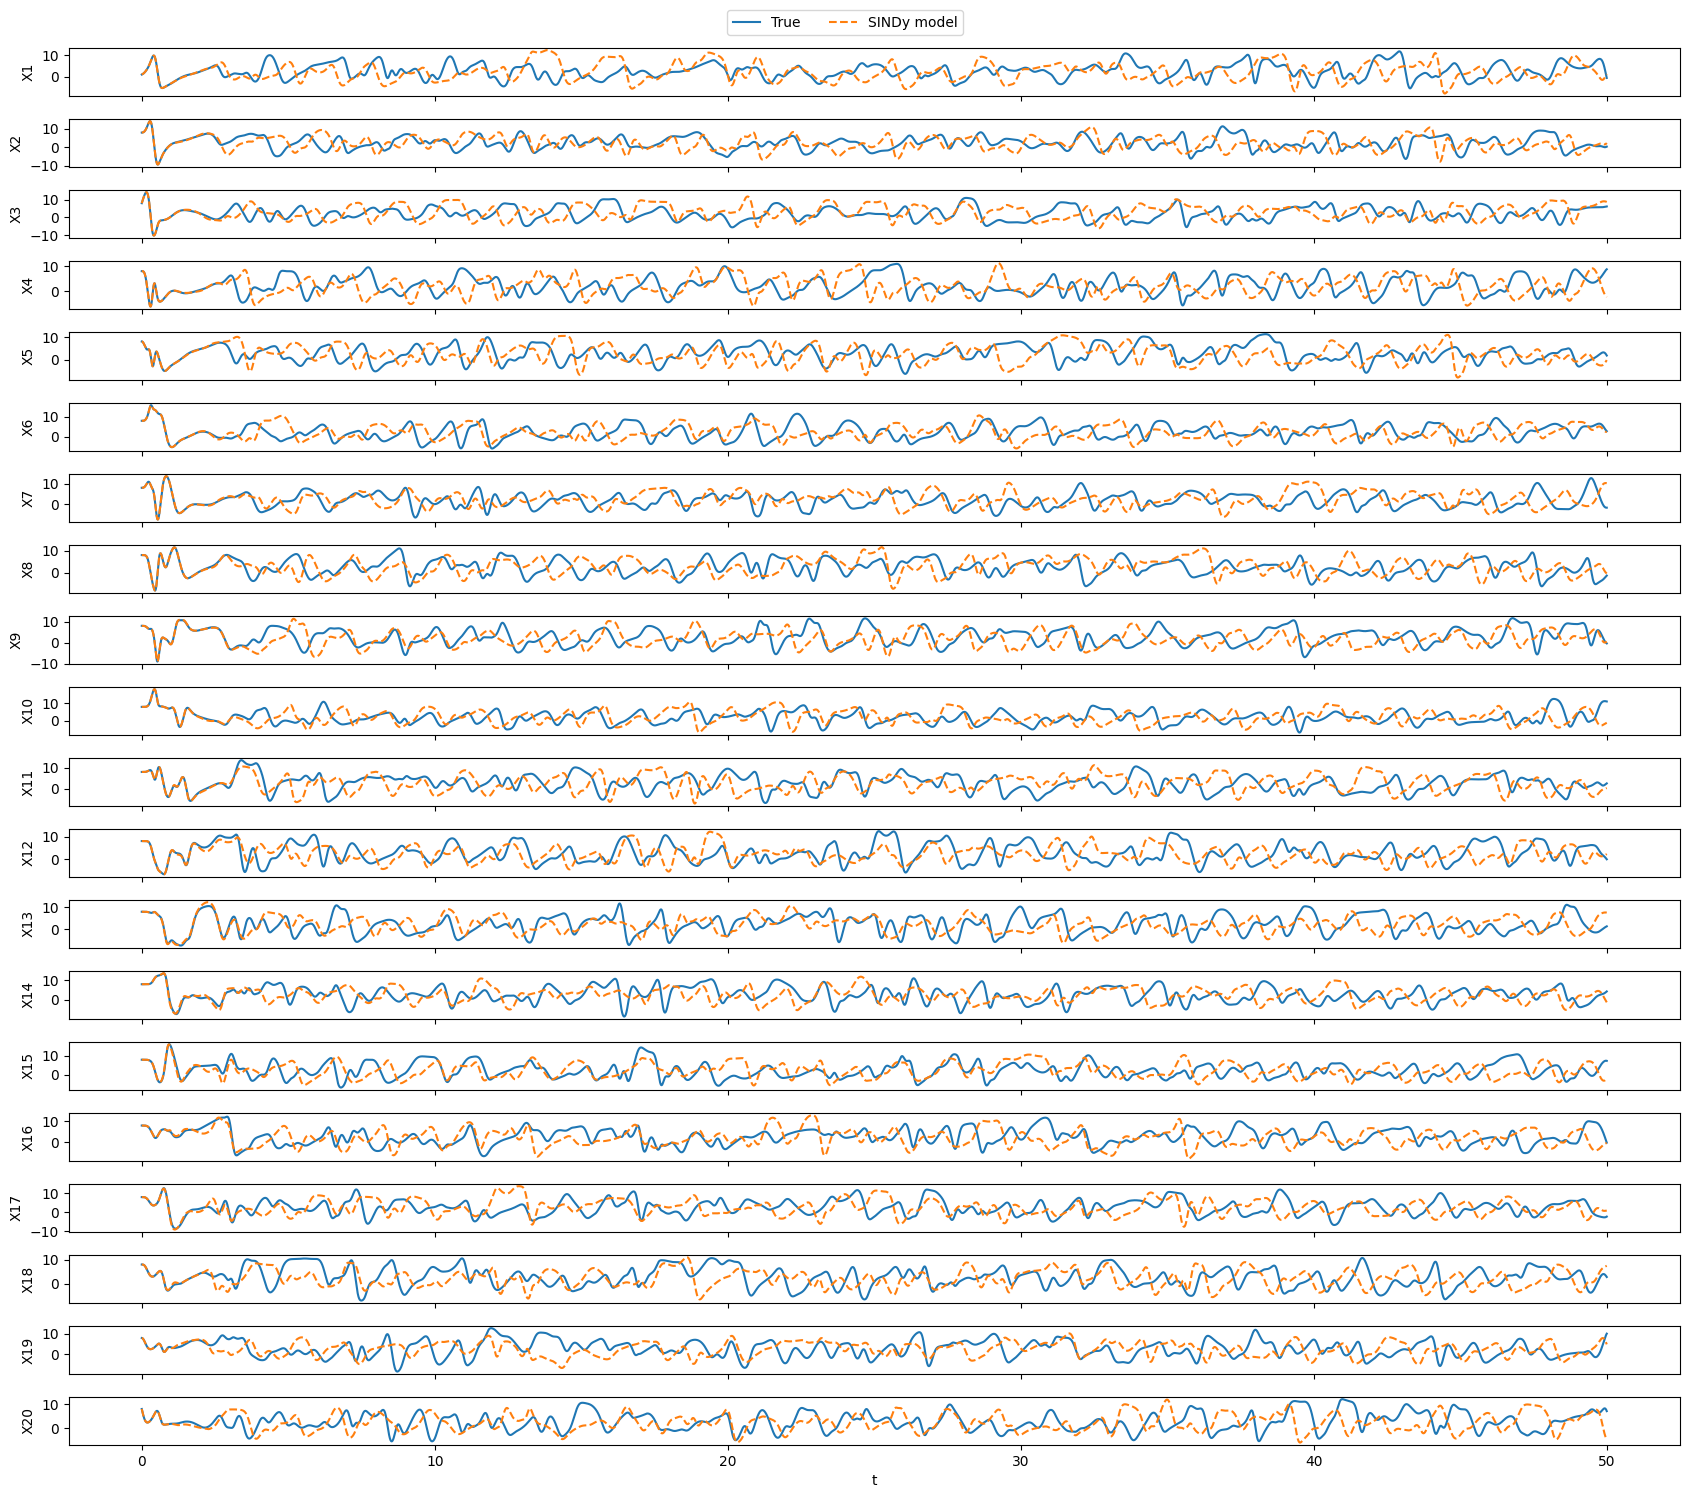

In [195]:
#Step 4: 
start_time = time.time() # start time
# x0, y0, z0 = X0
sim = model.simulate(X0, t=t)
end_time = time.time() # end time
run_time = end_time - start_time

# See the running time in the record_time.txt
with open('record_time.txt', 'a+') as f:
    f.write(f"Dimension: {n:>2}, Run time: {run_time:.2f}s\n")

# plot orbit
plt.ion()

fig = plt.figure(figsize=(17,15))
for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i], label='True')
    plt.plot(t, sim[:, i], '--', label='SINDy model')
    
    if i < n-1: 
        plt.tick_params(axis='x', labelbottom=False)
    plt.ylabel('X'+str(i+1))

plt.xlabel('t')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.show()

